In [2]:
#ładowanie niezbędnych pakietów
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## 1. Wczytaj dane

In [3]:
df = pd.read_excel("C:/Users/student/Desktop/BIG_DATA/Concrete_Data.xls", comment="#")

In [4]:
df

Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...                                                 ...       
1025                                              116.0       
1026                                                0.0       
1027                                              139.4       
1028                                              186.7       
1029                                              100.5       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
1025                                        90.3   
1026                                       115.6   
1027                                       108.6   
1028                                         0.0   
1029                                        78.3   

      Water  (component 4)(kg in a m^3 mixture)  \
0                                         162.0   
1                                         162.0   
2                                         228.0   
3                                         228.0   
4                                         192.0   
...                                         ...   
1025                                      179.6   
1026                                      196.0   
1027                                      192.7   
1028                                      175.6   
1029                                      200.6   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                   2.5     
1                                                   2.5     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
1025                                                8.9     
1026                                               10.4     
1027                                                6.1     
1028                                               11.3     
1029                                                8.6     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                                1040.0      
1                                                1055.0      
2                                                 932.0      
3                                                 932.0      
4                                                 978.4      
...                                                 ...      
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                         

In [4]:
#zmiana nazw kolumn
df = df.set_axis(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Concrete compressive strength' ], axis=1, inplace=False)


In [5]:
df

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
0               1040.0           676.0   28                      79.986111  
1               1055.0           676.0   28                      61.887366  
2                932.0           594.0  270                      40.269535  
3                932.0           594.0  365                      41.052780  
4                978.4           825.5  360                      44.296075  
...                ...             ...  ...                            ...  
1025             870.1           768.3   28                      44.284354  
1026             817.9           813.4   28                      31.178794  
1027             892.4           780.0   28                      23.696601  
1028             989.6           788.9   28                      32.768036  
1029             864.5           761.5   28                      32.401235  

[1030 rows x 9 columns]

## 2. Sprawdź czy nie występują braki danych

In [6]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Nie mamy braków danych

## 3. Wyznacz podstawowe statystyki zbioru

In [8]:
df.describe().T

count        mean         std         min  \
Cement                         1030.0  281.165631  104.507142  102.000000   
Blast Furnace Slag             1030.0   73.895485   86.279104    0.000000   
Fly Ash                        1030.0   54.187136   63.996469    0.000000   
Water                          1030.0  181.566359   21.355567  121.750000   
Superplasticizer               1030.0    6.203112    5.973492    0.000000   
Coarse Aggregate               1030.0  972.918592   77.753818  801.000000   
Fine Aggregate                 1030.0  773.578883   80.175427  594.000000   
Age                            1030.0   45.662136   63.169912    1.000000   
Concrete compressive strength  1030.0   35.817836   16.705679    2.331808   

                                      25%         50%          75%  \
Cement                         192.375000  272.900000   350.000000   
Blast Furnace Slag               0.000000   22.000000   142.950000   
Fly Ash                          0.000000    0.000000   118.270000   
Water                          164.900000  185.000000   192.000000   
Superplasticizer                 0.000000    6.350000    10.160000   
Coarse Aggregate               932.000000  968.000000  1029.400000   
Fine Aggregate                 730.950000  779.510000   824.000000   
Age                              7.000000   28.000000    56.000000   
Concrete compressive strength   23.707115   34.442774    46.136287   

                                       max  
Cement                          540.000000  
Blast Furnace Slag              359.400000  
Fly Ash                         200.100000  
Water                           247.000000  
Superplasticizer                 32.200000  
Coarse Aggregate               1145.000000  
Fine Aggregate                  992.600000  
Age                             365.000000  
Concrete compressive strength    82.599225

## 4. Stwórz wykresy wybranych zmiennych

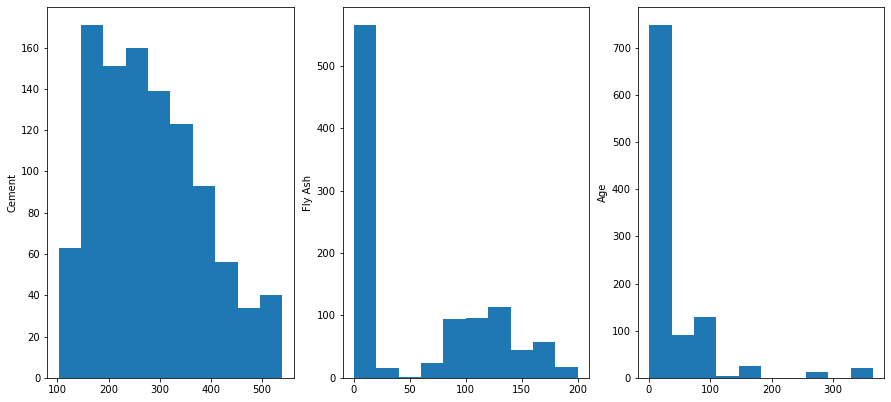

In [9]:

plt.figure(figsize=(15,15))

plt.subplot(231)
plt.hist(df['Cement'])
plt.ylabel('Cement')

plt.subplot(232)
plt.hist(df['Fly Ash'])
plt.ylabel('Fly Ash')

plt.subplot(233)
plt.hist(df['Age'])
plt.ylabel('Age')


plt.show()

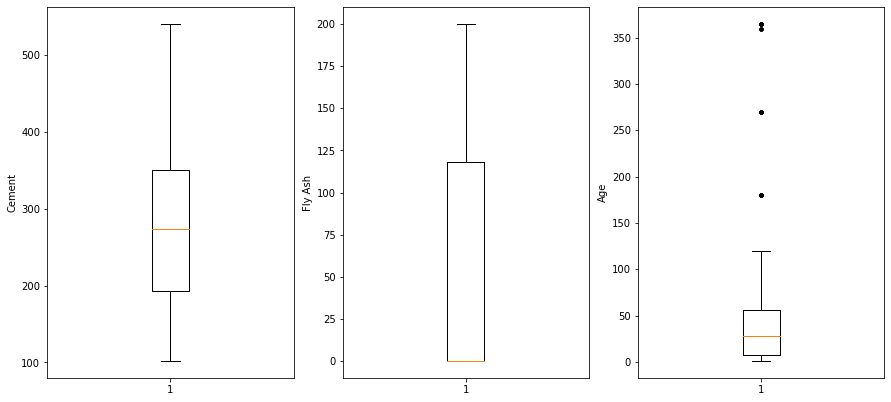

In [10]:


plt.figure(figsize=(15,15))

plt.subplot(231)
plt.boxplot(df['Cement'].dropna(), sym='k.') 
plt.ylabel('Cement')

plt.subplot(232)
plt.boxplot(df['Fly Ash'].dropna(), sym='k.') 
plt.ylabel('Fly Ash')

plt.subplot(233)
plt.boxplot(df['Age'].dropna(), sym='k.') 
plt.ylabel('Age')


plt.show()

## 5. Oblicz korelacje między zmiennymi i wyciągnij wnioski

In [11]:
korelacja_P = df.corr('pearson')
korelacja_P

Cement  Blast Furnace Slag   Fly Ash  \
Cement                         1.000000           -0.275193 -0.397475   
Blast Furnace Slag            -0.275193            1.000000 -0.323569   
Fly Ash                       -0.397475           -0.323569  1.000000   
Water                         -0.081544            0.107286 -0.257044   
Superplasticizer               0.092771            0.043376  0.377340   
Coarse Aggregate              -0.109356           -0.283998 -0.009977   
Fine Aggregate                -0.222720           -0.281593  0.079076   
Age                            0.081947           -0.044246 -0.154370   
Concrete compressive strength  0.497833            0.134824 -0.105753   

                                  Water  Superplasticizer  Coarse Aggregate  \
Cement                        -0.081544          0.092771         -0.109356   
Blast Furnace Slag             0.107286          0.043376         -0.283998   
Fly Ash                       -0.257044          0.377340         -0.009977   
Water                          1.000000         -0.657464         -0.182312   
Superplasticizer              -0.657464          1.000000         -0.266303   
Coarse Aggregate              -0.182312         -0.266303          1.000000   
Fine Aggregate                -0.450635          0.222501         -0.178506   
Age                            0.277604         -0.192717         -0.003016   
Concrete compressive strength -0.289613          0.366102         -0.164928   

                               Fine Aggregate       Age  \
Cement                              -0.222720  0.081947   
Blast Furnace Slag                  -0.281593 -0.044246   
Fly Ash                              0.079076 -0.154370   
Water                               -0.450635  0.277604   
Superplasticizer                     0.222501 -0.192717   
Coarse Aggregate                    -0.178506 -0.003016   
Fine Aggregate                       1.000000 -0.156094   
Age                                 -0.156094  1.000000   
Concrete compressive strength       -0.167249  0.328877   

                               Concrete compressive strength  
Cement                                              0.497833  
Blast Furnace Slag                                  0.134824  
Fly Ash                                            -0.105753  
Water                                              -0.289613  
Superplasticizer                                    0.366102  
Coarse Aggregate                                   -0.164928  
Fine Aggregate                                     -0.167249  
Age                                                 0.328877  
Concrete compressive strength                       1.000000

In [12]:
korelacja_S = df.corr('spearman')
korelacja_S

Cement  Blast Furnace Slag   Fly Ash  \
Cement                         1.000000           -0.250407 -0.418352   
Blast Furnace Slag            -0.250407            1.000000 -0.247313   
Fly Ash                       -0.418352           -0.247313  1.000000   
Water                         -0.094417            0.049426 -0.283085   
Superplasticizer               0.038397            0.093568  0.454713   
Coarse Aggregate              -0.144856           -0.347961  0.058316   
Fine Aggregate                -0.173641           -0.296476  0.051365   
Age                            0.004631           -0.017424  0.002802   
Concrete compressive strength  0.477601            0.162473 -0.077957   

                                  Water  Superplasticizer  Coarse Aggregate  \
Cement                        -0.094417          0.038397         -0.144856   
Blast Furnace Slag             0.049426          0.093568         -0.347961   
Fly Ash                       -0.283085          0.454713          0.058316   
Water                          1.000000         -0.687060         -0.218499   
Superplasticizer              -0.687060          1.000000         -0.198629   
Coarse Aggregate              -0.218499         -0.198629          1.000000   
Fine Aggregate                -0.345753          0.167703         -0.100438   
Age                            0.090939         -0.009753         -0.044928   
Concrete compressive strength -0.308371          0.347589         -0.183516   

                               Fine Aggregate       Age  \
Cement                              -0.173641  0.004631   
Blast Furnace Slag                  -0.296476 -0.017424   
Fly Ash                              0.051365  0.002802   
Water                               -0.345753  0.090939   
Superplasticizer                     0.167703 -0.009753   
Coarse Aggregate                    -0.100438 -0.044928   
Fine Aggregate                       1.000000 -0.057363   
Age                                 -0.057363  1.000000   
Concrete compressive strength       -0.179991  0.596020   

                               Concrete compressive strength  
Cement                                              0.477601  
Blast Furnace Slag                                  0.162473  
Fly Ash                                            -0.077957  
Water                                              -0.308371  
Superplasticizer                                    0.347589  
Coarse Aggregate                                   -0.183516  
Fine Aggregate                                     -0.179991  
Age                                                 0.596020  
Concrete compressive strength                       1.000000

In [13]:
#tworzymy macierz trójkątną i wyświetlamy wspóczynnik korelacji większy od 0.5
korelacja_P_tr = korelacja_P.where(np.triu(np.ones(korelacja_P.shape, dtype=np.bool), k=1)).stack().sort_values()
korelacja_P_tr

<ipython-input-13-c95dfbe1ab99>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  korelacja_P_tr = korelacja_P.where(np.triu(np.ones(korelacja_P.shape, dtype=np.bool), k=1)).stack().sort_values()


Water               Superplasticizer                -0.657464
                    Fine Aggregate                  -0.450635
Cement              Fly Ash                         -0.397475
Blast Furnace Slag  Fly Ash                         -0.323569
Water               Concrete compressive strength   -0.289613
Blast Furnace Slag  Coarse Aggregate                -0.283998
                    Fine Aggregate                  -0.281593
Cement              Blast Furnace Slag              -0.275193
Superplasticizer    Coarse Aggregate                -0.266303
Fly Ash             Water                           -0.257044
Cement              Fine Aggregate                  -0.222720
Superplasticizer    Age                             -0.192717
Water               Coarse Aggregate                -0.182312
Coarse Aggregate    Fine Aggregate                  -0.178506
Fine Aggregate      Concrete compressive strength   -0.167249
Coarse Aggregate    Concrete compressive strength   -0.164928
Fine Agg

In [14]:
 korelacja_P_tr[abs(korelacja_P_tr)>0.5]

Water  Superplasticizer   -0.657464
dtype: float64

In [15]:
Kor_P = df[['Water', 'Superplasticizer']]

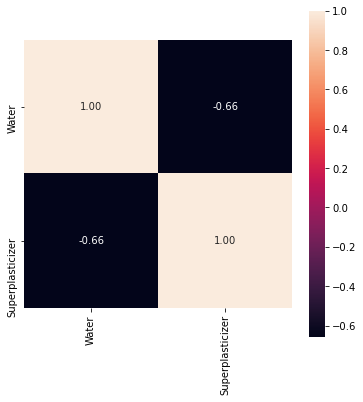

In [16]:
plt.figure(figsize=(6,6))
ax = sns.heatmap(Kor_P.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

In [17]:
korelacja_S_tr = korelacja_S.where(np.triu(np.ones(korelacja_S.shape, dtype=np.bool), k=1)).stack().sort_values()
korelacja_S_tr[abs(korelacja_S_tr)>0.5]

<ipython-input-17-38947575f0df>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  korelacja_S_tr = korelacja_S.where(np.triu(np.ones(korelacja_S.shape, dtype=np.bool), k=1)).stack().sort_values()


Water  Superplasticizer                -0.68706
Age    Concrete compressive strength    0.59602
dtype: float64

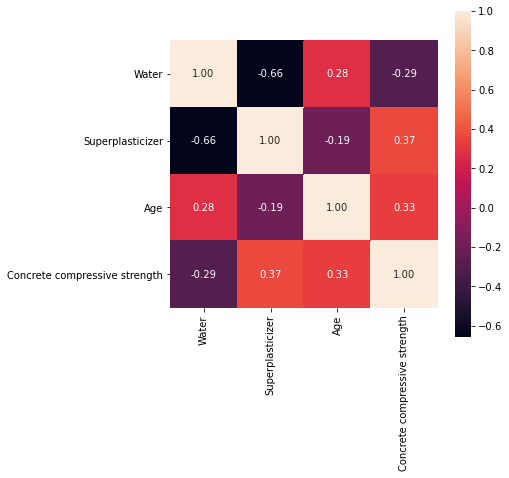

In [18]:
Kor_S = df[['Water', 'Superplasticizer', 'Age', 'Concrete compressive strength']]
plt.figure(figsize=(6,6))
ax = sns.heatmap(Kor_S.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

Dla pearsona mamy dwie zmienne, dla których korelacja jest większa niż 0.5 (Water  Superplasticizer)
natomiast dla Spearmana mamy dwie pary takich zmiennych (Water i Superplasticizer(-0.69) oraz Age  i  Concrete compressive strength (0.6)) )

## 6. Sprawdź czy w zbiorze występują obserwacje oddalone, a jeżeli tak to je usuń

In [19]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

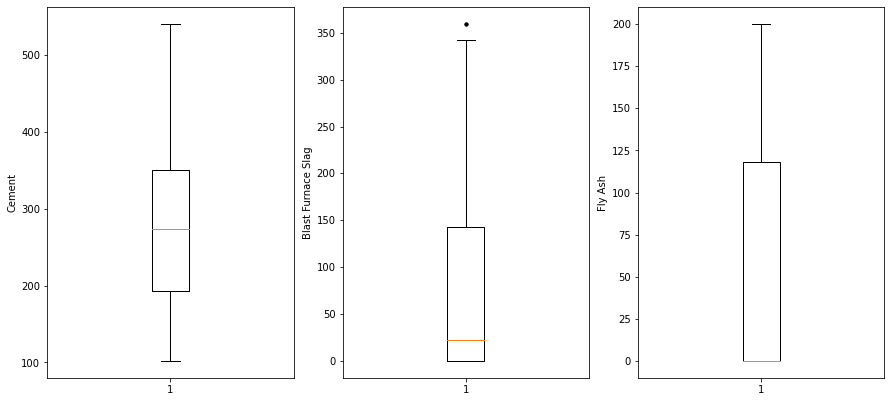

In [20]:
#ponownie skorzystamy z boxplotow
plt.figure(figsize=(15,15))

plt.subplot(231)
plt.boxplot(df['Cement'].dropna(), sym='k.') 
plt.ylabel('Cement')

plt.subplot(232)
plt.boxplot(df['Blast Furnace Slag'].dropna(), sym='k.') 
plt.ylabel('Blast Furnace Slag')

plt.subplot(233)
plt.boxplot(df['Fly Ash'].dropna(), sym='k.') 
plt.ylabel('Fly Ash')

plt.show()

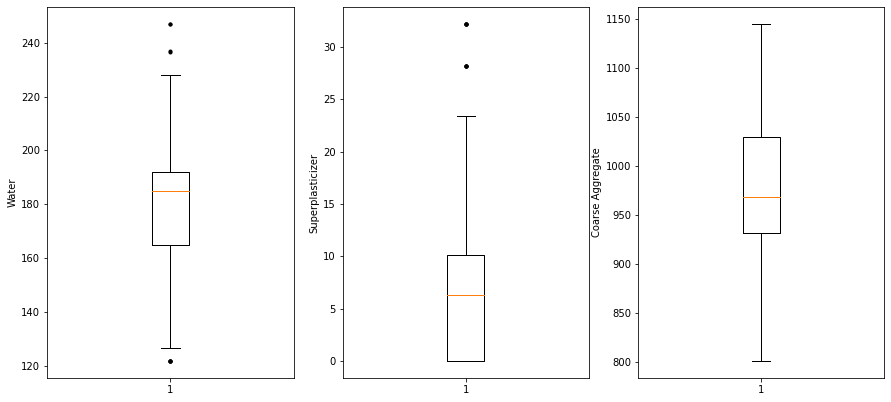

In [21]:
plt.figure(figsize=(15,15))

plt.subplot(231)
plt.boxplot(df['Water'].dropna(), sym='k.') 
plt.ylabel('Water')

plt.subplot(232)
plt.boxplot(df['Superplasticizer'].dropna(), sym='k.') 
plt.ylabel('Superplasticizer')

plt.subplot(233)
plt.boxplot(df['Coarse Aggregate'].dropna(), sym='k.') 
plt.ylabel('Coarse Aggregate')

plt.show()

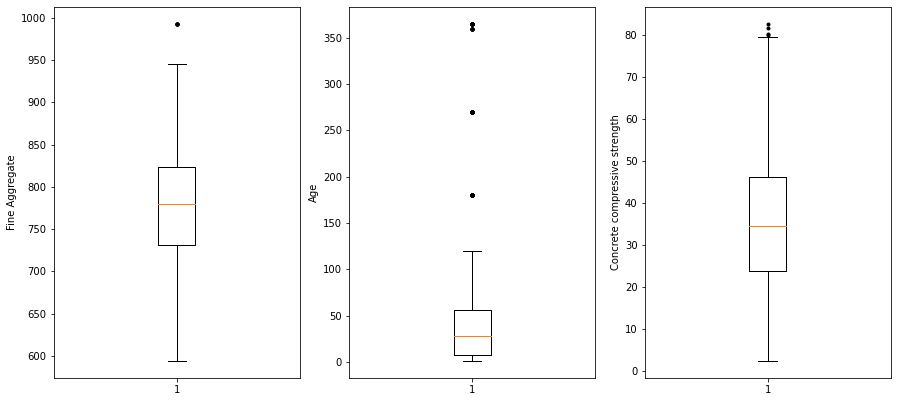

In [22]:
plt.figure(figsize=(15,15))

plt.subplot(231)
plt.boxplot(df['Fine Aggregate'].dropna(), sym='k.') 
plt.ylabel('Fine Aggregate')

plt.subplot(232)
plt.boxplot(df['Age'].dropna(), sym='k.') 
plt.ylabel('Age')

plt.subplot(233)
plt.boxplot(df['Concrete compressive strength'].dropna(), sym='k.') 
plt.ylabel('Concrete compressive strength')

plt.show()

Mamy wartosci odstajace w zmiennych Blast Furnace Slag, Water, Superplasticizer, Fine Aggregate, Age, Concrete compressive strength.

In [23]:
#zamieniamy wartosci odstajace na te odpowiadajace wąsom w boxplocie
df.loc[df['Blast Furnace Slag'] > 350, 'Blast Furnace Slag'] = 340
df.loc[df['Water'] > 230, 'Water'] = 225
df.loc[df['Water'] < 138, 'Water'] = 138
df.loc[df['Superplasticizer'] > 25, 'Superplasticizer'] = 23
df.loc[df['Fine Aggregate'] > 950, 'Fine Aggregate'] = 945
df.loc[df['Age'] > 150, 'Age'] = 120
df.loc[df['Concrete compressive strength'] > 80, 'Concrete compressive strength'] = 78

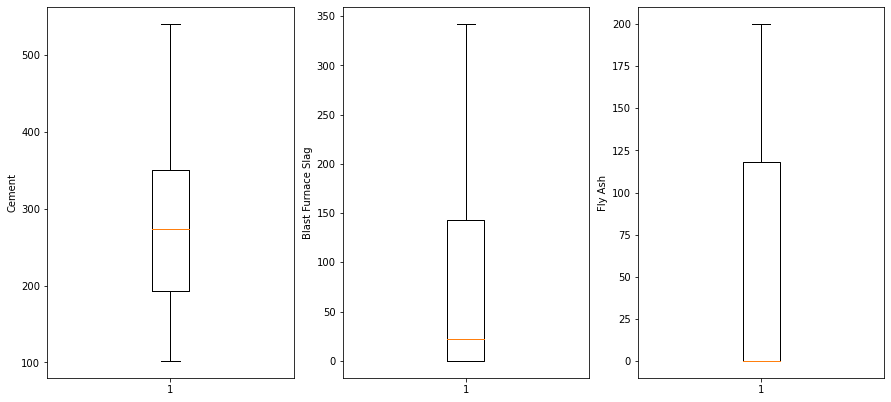

In [24]:
#ponownie skorzystamy z boxplotow
plt.figure(figsize=(15,15))

plt.subplot(231)
plt.boxplot(df['Cement'].dropna(), sym='k.') 
plt.ylabel('Cement')

plt.subplot(232)
plt.boxplot(df['Blast Furnace Slag'].dropna(), sym='k.') 
plt.ylabel('Blast Furnace Slag')

plt.subplot(233)
plt.boxplot(df['Fly Ash'].dropna(), sym='k.') 
plt.ylabel('Fly Ash')

plt.show()

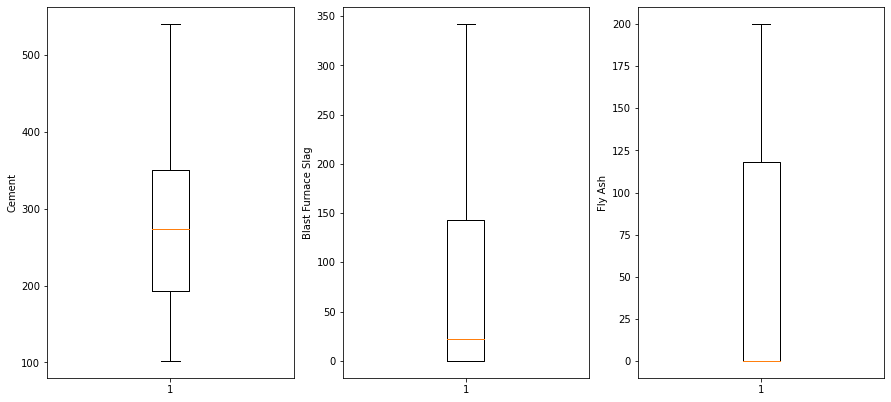

In [25]:
#ponownie wyswietlamy boxploty
plt.figure(figsize=(15,15))

plt.subplot(231)
plt.boxplot(df['Cement'].dropna(), sym='k.') 
plt.ylabel('Cement')

plt.subplot(232)
plt.boxplot(df['Blast Furnace Slag'].dropna(), sym='k.') 
plt.ylabel('Blast Furnace Slag')

plt.subplot(233)
plt.boxplot(df['Fly Ash'].dropna(), sym='k.') 
plt.ylabel('Fly Ash')

plt.show()

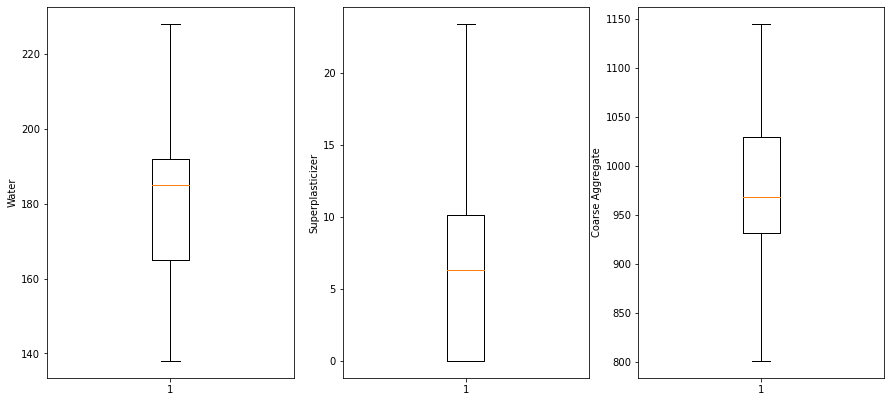

In [26]:
plt.figure(figsize=(15,15))

plt.subplot(231)
plt.boxplot(df['Water'].dropna(), sym='k.') 
plt.ylabel('Water')

plt.subplot(232)
plt.boxplot(df['Superplasticizer'].dropna(), sym='k.') 
plt.ylabel('Superplasticizer')

plt.subplot(233)
plt.boxplot(df['Coarse Aggregate'].dropna(), sym='k.') 
plt.ylabel('Coarse Aggregate')

plt.show()

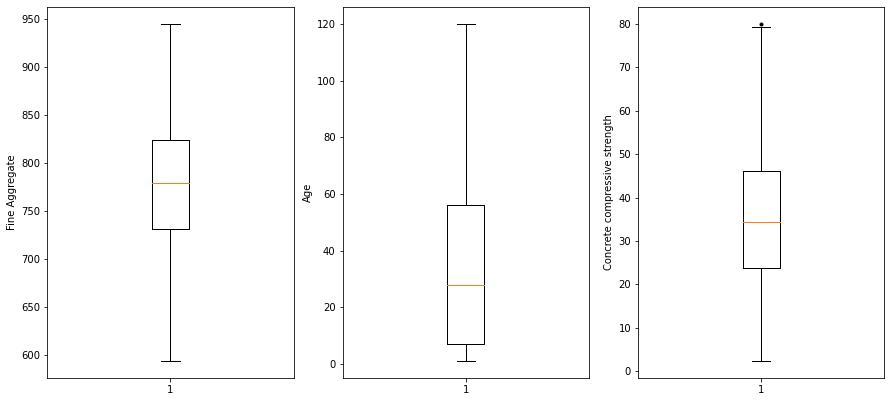

In [27]:
plt.figure(figsize=(15,15))

plt.subplot(231)
plt.boxplot(df['Fine Aggregate'].dropna(), sym='k.') 
plt.ylabel('Fine Aggregate')

plt.subplot(232)
plt.boxplot(df['Age'].dropna(), sym='k.') 
plt.ylabel('Age')

plt.subplot(233)
plt.boxplot(df['Concrete compressive strength'].dropna(), sym='k.') 
plt.ylabel('Concrete compressive strength')

plt.show()

## 7. Wydziel ze zbioru predyktory i zmienną celu oraz podziel dane na zbiór treningowy i testowy

In [28]:
df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
0            1040.0           676.0   28                      79.986111  
1            1055.0           676.0   28                      61.887366  
2             932.0           594.0  120                      40.269535  
3             932.0           594.0  120                      41.052780  
4             978.4           825.5  120                      44.296075

In [29]:
# Podział zbioru

X = df.drop(labels=['Concrete compressive strength'], axis=1)
Y = df.iloc[:, ]

In [30]:
import sklearn.linear_model

In [31]:
# podział na zbiory uczący i testowy
X_ucz, X_test, Y_ucz, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=12345)
print(X_ucz.shape)
print(X_test.shape)
print(Y_ucz.shape)
print(Y_test.shape)

(824, 8)
(206, 8)
(824, 9)
(206, 9)


## 8. Stwórz modele regresji liniowej (najlepiej kilka w celach porównawczych)

In [32]:
def fit_pred(model,X_u, Y_u, X_t, Y_t):
    model.fit(X_u, Y_u)

    Y_u_pred = model.predict(X_u)
    Y_t_pred = model.predict(X_t)

    return{
        "R^2_u": sklearn.metrics.r2_score(Y_u, Y_u_pred),
        "R^2_t": sklearn.metrics.r2_score(Y_t, Y_t_pred),
        "MSE_u": sklearn.metrics.mean_squared_error(Y_u, Y_u_pred),
        "MSE_t": sklearn.metrics.mean_squared_error(Y_t, Y_t_pred),
        "MAE_u": sklearn.metrics.mean_absolute_error(Y_u, Y_u_pred),
        "MAE_t": sklearn.metrics.mean_absolute_error(Y_t, Y_t_pred),
        "MEDAE_u": sklearn.metrics.median_absolute_error(Y_u, Y_u_pred),
        "MEDAE_t": sklearn.metrics.median_absolute_error(Y_t, Y_t_pred)
    }

In [33]:
regresja = sklearn.linear_model.LinearRegression()
regresja.fit(X_ucz,Y_ucz)

LinearRegression()

In [34]:
Y_ucz_pred = regresja.predict(X_ucz)

Do sprawdzenia dopasowania modelu służą różne metryki dostępne w pakiecie sklearn.metrics. Poniżej sprawdzamy błąd średniokwadratowy oraz współczynnik determinacji R^2.

In [35]:
print(sklearn.metrics.mean_squared_error(Y_ucz, Y_ucz_pred))
print(sklearn.metrics.r2_score(Y_ucz, Y_ucz_pred))

7.878020903804794
0.9710483814361015


In [36]:
nazwy = ["Reg. lin. 1"]
wyniki = [fit_pred(sklearn.linear_model.LinearRegression(),X_ucz, Y_ucz, X_test, Y_test)]
metryki = pd.DataFrame(wyniki, index = nazwy)

Zmieniamy procentowy podzial na zbiory uczacy i testowy

In [37]:
X_ucz, X_test, Y_ucz, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=12345)
print(X_ucz.shape)
print(X_test.shape)
print(Y_ucz.shape)
print(Y_test.shape)

(721, 8)
(309, 8)
(721, 9)
(309, 9)


In [38]:
regresja2 = sklearn.linear_model.LinearRegression()
regresja2.fit(X_ucz,Y_ucz)

LinearRegression()

In [39]:
Y_ucz_pred = regresja.predict(X_ucz)

In [40]:
print(sklearn.metrics.mean_squared_error(Y_ucz, Y_ucz_pred))
print(sklearn.metrics.r2_score(Y_ucz, Y_ucz_pred))

8.016749316805829
0.9707110920308032


In [41]:
nazwy = ["Reg. lin. 2"]
wyniki = [fit_pred(sklearn.linear_model.LinearRegression(),X_ucz, Y_ucz, X_test, Y_test)]
metryki = metryki.append(pd.DataFrame(wyniki, index = nazwy))

## 9. Dokonaj optymalizacji hiperparametrów wybranego modelu

In [42]:
# standaryzacja
X_ucz_std = (X_ucz - X_ucz.mean())/X_ucz.std()
X_test_std = (X_test - X_test.mean())/X_test.std()
Y_ucz_std = (Y_ucz - Y_ucz.mean())/Y_ucz.std()
Y_test_std = (Y_test - Y_test.mean())/Y_test.std()

In [43]:
nazwy = ["Reg. lin2. std"]
wyniki = [fit_pred(sklearn.linear_model.LinearRegression(),X_ucz_std, Y_ucz_std, X_test_std, Y_test_std)]
metryki = metryki.append(pd.DataFrame(wyniki, index = nazwy))

In [44]:
# normalizacja
X_ucz_n = (X_ucz - X_ucz.min())/(X_ucz.max() - X_ucz.min())
X_test_n = (X_test - X_test.min())/(X_test.max() - X_test.min())
Y_ucz_n = (Y_ucz - Y_ucz.min())/(Y_ucz.max() - Y_ucz.min())
Y_test_n = (Y_test - Y_test.min())/(Y_test.max() - Y_test.min())

In [45]:
nazwy = ["Reg. lin2. norm"]
wyniki = [fit_pred(sklearn.linear_model.LinearRegression(),X_ucz_n, Y_ucz_n, X_test_n, Y_test_n)]
metryki = metryki.append(pd.DataFrame(wyniki, index = nazwy))


## 10.Przedstaw metryki modeli i wyciągnij wnioski

In [46]:
metryki

R^2_u     R^2_t     MSE_u     MSE_t     MAE_u     MAE_t  \
Reg. lin. 1      0.971048  0.970281  7.878021  8.899271  0.729406  0.763829   
Reg. lin. 2      0.970738  0.971181  8.009426  8.289322  0.732287  0.747774   
Reg. lin2. std   0.970738  0.970836  0.029222  0.029069  0.044232  0.044305   
Reg. lin2. norm  0.970738  0.969310  0.001352  0.001552  0.009515  0.010203   

                  MEDAE_u   MEDAE_t  
Reg. lin. 1      0.591740  0.553519  
Reg. lin. 2      0.594736  0.573041  
Reg. lin2. std   0.035923  0.033707  
Reg. lin2. norm  0.007727  0.007950